<a href="https://colab.research.google.com/github/FlamingoLindo/UMC-Age-of-Empires-2/blob/main/teste_age_of_empires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports das bibliotecas necessárias para o projeto

In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

# Importação do dataset diretamente do repositório do projeto

O dataset utilizado nesse projeto foi obtido no site Kaggle, criado pelo usuário Nico Elbert:
https://www.kaggle.com/datasets/nicoelbert/aoe-matchups?resource=download

In [240]:
file_path = 'https://raw.githubusercontent.com/FlamingoLindo/UMC-Age-of-Empires-2/main/aoe_data.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,match_id,map,map_size,duration,dataset,difficulty,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner
0,50453403,50453403,Arabia,Tiny,3445,Definitive Edition,Hardest,1104.0,Vikings,Mayans,92.0,24.0,37.0,78.0,0
1,118982970,118982970,Arena,Tiny,2932,Definitive Edition,Hardest,884.5,Britons,Goths,70.0,82.0,16.0,98.0,0
2,57185801,57185801,Arena,Tiny,2573,Definitive Edition,Hardest,905.5,Chinese,Malians,69.0,61.0,16.0,104.0,0
3,64335748,64335748,Arabia,Tiny,851,Definitive Edition,Hardest,1080.0,Mayans,Magyars,25.0,98.0,80.0,68.0,1
4,116883036,116883036,Arabia,Tiny,4737,Definitive Edition,Hardest,1050.0,Berbers,Slavs,83.0,30.0,28.0,85.0,1


# Análise de valores unícos do dataset

In [241]:
colunas = df.columns

for nome_coluna in colunas:
    unique_values = df[nome_coluna].unique()
    unique_qnt = df[nome_coluna].nunique()
    print(f'Valores unícos em {nome_coluna}: {unique_values}')
    print(f'Quantidade de valores unicos {unique_qnt} \n')

Valores unícos em Unnamed: 0: [ 50453403 118982970  57185801 ... 124942713 141486159 139998132]
Quantidade de valores unicos 224599 

Valores unícos em match_id: [ 50453403 118982970  57185801 ... 124942713 141486159 139998132]
Quantidade de valores unicos 224599 

Valores unícos em map: ['Arabia' 'Arena' 'Four Lakes' 'Steppe' 'Golden Pit' 'African Clearing'
 'Serengeti' 'Nomad' 'MegaRandom' 'Coastal Forest' 'Atacama' 'Acropolis'
 'Golden Swamp' 'Gold Rush' 'Aftermath' 'Socotra' 'Hideout' 'Valley'
 'Water Nomad' 'Mongolia' 'Ghost Lake' 'Baltic' 'Marketplace'
 'Archipelago' 'Runestones' 'Islands' 'Crater' 'Mediterranean'
 'Land Nomad' 'Migration' 'Team Islands' 'Wade' 'Land Madness' 'Lowland'
 'Fortress' 'Seize the Mountain' 'Greenland' 'Lombardia' 'Hill Fort'
 'Haboob' 'Volcanic Island' 'Yucatan' 'Cenotes' 'Coastal' 'Northern Isles']
Quantidade de valores unicos 45 

Valores unícos em map_size: ['Tiny']
Quantidade de valores unicos 1 

Valores unícos em duration: [3445 2932 2573 ... 59

# Criar um dataframe apenas para testes e treinamento

In [242]:
train_df = df.copy()

# Remoção de colunas não necessárias

In [243]:
#
train_df.drop([ 'map_size', 'dataset', 'difficulty'], axis=1, inplace=True)
train_df.head()

,Unnamed: 0,match_id,map,duration,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner
0,50453403,50453403,Arabia,3445,1104.0,Vikings,Mayans,92.0,24.0,37.0,78.0,0
1,118982970,118982970,Arena,2932,884.5,Britons,Goths,70.0,82.0,16.0,98.0,0
2,57185801,57185801,Arena,2573,905.5,Chinese,Malians,69.0,61.0,16.0,104.0,0
3,64335748,64335748,Arabia,851,1080.0,Mayans,Magyars,25.0,98.0,80.0,68.0,1
4,116883036,116883036,Arabia,4737,1050.0,Berbers,Slavs,83.0,30.0,28.0,85.0,1


# Valores nulos no dataset

In [244]:
train_df.isna().sum()

Unnamed: 0        0
match_id          0
map               0
duration          0
elo               0
p1_civ            0
p2_civ            0
p1_xpos       10596
p2_xpos       10596
p1_ypos       10596
p2_ypos       10596
winner            0
dtype: int64

Aqui é possivel ver que existem "10596" valores como "NaN" nas colunas de coordenadas iniciais dos jogadores.

## Pode-se optar por remover todas as linhas que contem valores com "NaN" ou fazer a média dos valores existentes e então substiruir os não existentes pela média:

In [245]:

#Caso queira utilizar a média das cooredenas ao invés de apenas remover as linhas
#com NaN

# Média p1_xpos
med_p1x = train_df['p1_xpos'].mean()
train_df['p1_xpos'] = train_df['p1_xpos'].fillna(med_p1x)

# Média p2_xpos
med_p2x = train_df['p2_xpos'].mean()
train_df['p2_xpos'] = train_df['p2_xpos'].fillna(med_p2x)
# Média p1_ypos
med_p1y = train_df['p1_ypos'].mean()
train_df['p1_ypos'] = train_df['p1_ypos'].fillna(med_p1y)

# Média p2_ypos
med_p2y = train_df['p2_ypos'].mean()
train_df['p2_ypos'] = train_df['p2_ypos'].fillna(med_p2y)

# train_df.dropna(inplace=True)
# train_df.isna().sum()
print(train_df)

        Unnamed: 0   match_id     map  duration     elo      p1_civ  \
0         50453403   50453403  Arabia      3445  1104.0     Vikings   
1        118982970  118982970   Arena      2932   884.5     Britons   
2         57185801   57185801   Arena      2573   905.5     Chinese   
3         64335748   64335748  Arabia       851  1080.0      Mayans   
4        116883036  116883036  Arabia      4737  1050.0     Berbers   
...            ...        ...     ...       ...     ...         ...   
224594   137272191  137272191  Arabia      2525  1540.0     Mongols   
224595   114000000  114000000   Nomad      3208  1066.0     Berbers   
224596   124942713  124942713  Arabia      4243   870.5  Bulgarians   
224597   141486159  141486159  Arabia      3280  1234.5       Turks   
224598   139998132  139998132  Arabia      2506  1432.0     Vikings   

            p2_civ     p1_xpos   p2_xpos    p1_ypos     p2_ypos  winner  
0           Mayans   92.000000  24.00000  37.000000   78.000000       0  

# Criar distância entre pontos

In [246]:
for cordenadas in train_df:
    distancia = np.sqrt((train_df['p2_xpos']-train_df['p2_xpos'])**2 + (train_df['p2_ypos']-train_df['p1_ypos'])**2)

train_df['distance'] = distancia
print(distancia)    

0         41.00000
1         82.00000
2         88.00000
3         12.00000
4         57.00000
            ...   
224594     1.00000
224595     0.00321
224596    36.00000
224597    23.00000
224598    70.00000
Length: 224599, dtype: float64


# Remoção de linhas para que o treinamento ocorra mas rápido

In [247]:
train_df['match_up'] = train_df['p1_civ'] + ' x ' +train_df['p2_civ']

train_df.head()

,Unnamed: 0,match_id,map,duration,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner,distance,match_up
0,50453403,50453403,Arabia,3445,1104.0,Vikings,Mayans,92.0,24.0,37.0,78.0,0,41.0,Vikings x Mayans
1,118982970,118982970,Arena,2932,884.5,Britons,Goths,70.0,82.0,16.0,98.0,0,82.0,Britons x Goths
2,57185801,57185801,Arena,2573,905.5,Chinese,Malians,69.0,61.0,16.0,104.0,0,88.0,Chinese x Malians
3,64335748,64335748,Arabia,851,1080.0,Mayans,Magyars,25.0,98.0,80.0,68.0,1,12.0,Mayans x Magyars
4,116883036,116883036,Arabia,4737,1050.0,Berbers,Slavs,83.0,30.0,28.0,85.0,1,57.0,Berbers x Slavs


In [248]:
train_df = train_df.sample(200)
print(train_df)

        Unnamed: 0   match_id         map  duration     elo      p1_civ  \
55925    101270166  101270166      Arabia      1639  1081.0     Berbers   
221818    84230708   84230708  Ghost Lake      2070  1281.5  Bulgarians   
113153    82620332   82620332      Arabia       209  1024.0       Turks   
16880    102513136  102513136      Arabia      4516   938.0     Indians   
181000   121489579  121489579      Arabia      2493  1307.0     Vikings   
...            ...        ...         ...       ...     ...         ...   
188705    97220327   97220327      Arabia      1766  1021.5      Franks   
168258   113168278  113168278      Arabia      1814   993.0     Magyars   
107112    90408605   90408605      Arabia      1746   961.0      Franks   
189038   111249562  111249562      Arabia      3677  1120.0      Aztecs   
190997    84979785   84979785      Arabia      2200  1096.5        Huns   

             p2_civ  p1_xpos  p2_xpos  p1_ypos  p2_ypos  winner  distance  \
55925       Spanish   

# Tipos de encoding para colunas categóricas

## Label encoding

In [249]:
le_map = LabelEncoder()
train_df['map_encoded'] = le_map.fit_transform(train_df['map'])

# le_civ = LabelEncoder()
# train_df['p1_civ_encoded'] = le_civ.fit_transform(train_df['p1_civ'])

# le_civ2 = LabelEncoder()
# train_df['p2_civ_encoded'] = le_civ2.fit_transform(train_df['p2_civ'])

le_matchup = LabelEncoder()
train_df['match_up_encoded'] = le_matchup.fit_transform(train_df['match_up'])

train_df.head()

,Unnamed: 0,match_id,map,duration,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner,distance,match_up,map_encoded,match_up_encoded
55925,101270166,101270166,Arabia,1639,1081.0,Berbers,Spanish,30.0,84.0,86.0,28.0,1,58.0,Berbers x Spanish,2,4
221818,84230708,84230708,Ghost Lake,2070,1281.5,Bulgarians,Franks,86.0,26.0,96.0,29.0,0,67.0,Bulgarians x Franks,8,15
113153,82620332,82620332,Arabia,209,1024.0,Turks,Spanish,34.0,71.0,29.0,98.0,0,69.0,Turks x Spanish,2,167
16880,102513136,102513136,Arabia,4516,938.0,Indians,Turks,63.0,34.0,20.0,91.0,1,71.0,Indians x Turks,2,83
181000,121489579,121489579,Arabia,2493,1307.0,Vikings,Britons,28.0,95.0,81.0,48.0,0,33.0,Vikings x Britons,2,176


## One hot

In [250]:
# one_map = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
# map_transformed = one_map.fit_transform(train_df[['map']])


# one_civ1 = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
# civ1_transformed = one_civ1.fit_transform(train_df[['p1_civ']])


# one_civ2 = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
# civ2_transformed = one_civ2.fit_transform(train_df[['p2_civ']])

# # Adicionar map_transformed se usar ele com onehot
# train_df = pd.concat([train_df, civ1_transformed, civ2_transformed], axis=1)
# train_df.head()

# Remoção de colunas categoricas

In [251]:
train_df.drop(['map', 'p1_civ', 'p2_civ','match_id','Unnamed: 0', 'match_up'], axis=1, inplace=True)
train_df.head()

# IF YOU REMOVE THE ELO OR THE DURATION COLUMN IT IT WILL MAKE THE ALGO GUESS IT WRONG???

,duration,elo,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner,distance,map_encoded,match_up_encoded
55925,1639,1081.0,30.0,84.0,86.0,28.0,1,58.0,2,4
221818,2070,1281.5,86.0,26.0,96.0,29.0,0,67.0,8,15
113153,209,1024.0,34.0,71.0,29.0,98.0,0,69.0,2,167
16880,4516,938.0,63.0,34.0,20.0,91.0,1,71.0,2,83
181000,2493,1307.0,28.0,95.0,81.0,48.0,0,33.0,2,176


# Separação de dados de teste e treino (80/20)

In [252]:
X = train_df.drop('winner', axis=1)
y = train_df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=train_df['winner'])


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treino do modelo SVC e matriz de confusão

In [253]:
model = SVC()
model.fit(X_train_scaled, y_train)

SVC()

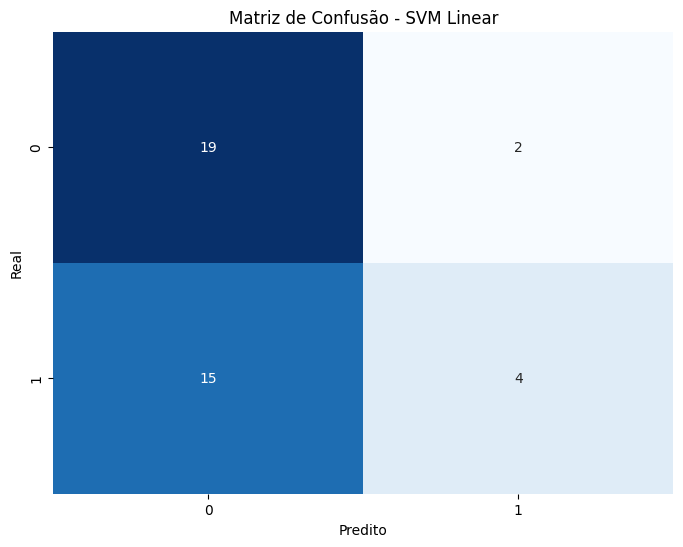

              precision    recall  f1-score   support

           0       0.56      0.90      0.69        21
           1       0.67      0.21      0.32        19

    accuracy                           0.57        40
   macro avg       0.61      0.56      0.51        40
weighted avg       0.61      0.57      0.51        40



In [254]:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - SVM Linear')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, y_pred))

# Treino do modelo com diferentes valores para C, Gamma e Kernels e os melhores parâmetros

In [255]:
svm = SVC(probability=True)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  
}

#https://scikit-learn.org/dev/modules/model_evaluation.html#matthews-correlation-coefficient
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)

grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [256]:
print('Melhores parâmetros: ', grid_search.best_params_)
print('Melhor estimador: ', grid_search.best_estimator_)

Melhores parâmetros:  {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
Melhor estimador:  SVC(C=0.1, degree=2, gamma=1, kernel='linear', probability=True)


In [257]:
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.55


## Matriz do treino com os melhores parâmetros

<Figure size 640x480 with 0 Axes>

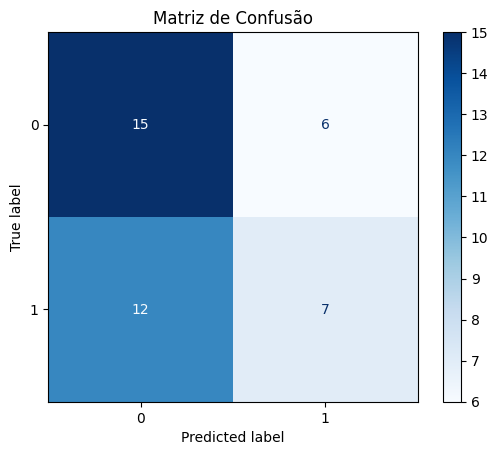

              precision    recall  f1-score   support

           0       0.56      0.71      0.62        21
           1       0.54      0.37      0.44        19

    accuracy                           0.55        40
   macro avg       0.55      0.54      0.53        40
weighted avg       0.55      0.55      0.54        40



In [258]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()
print(classification_report(y_test, y_pred))

# Permutação

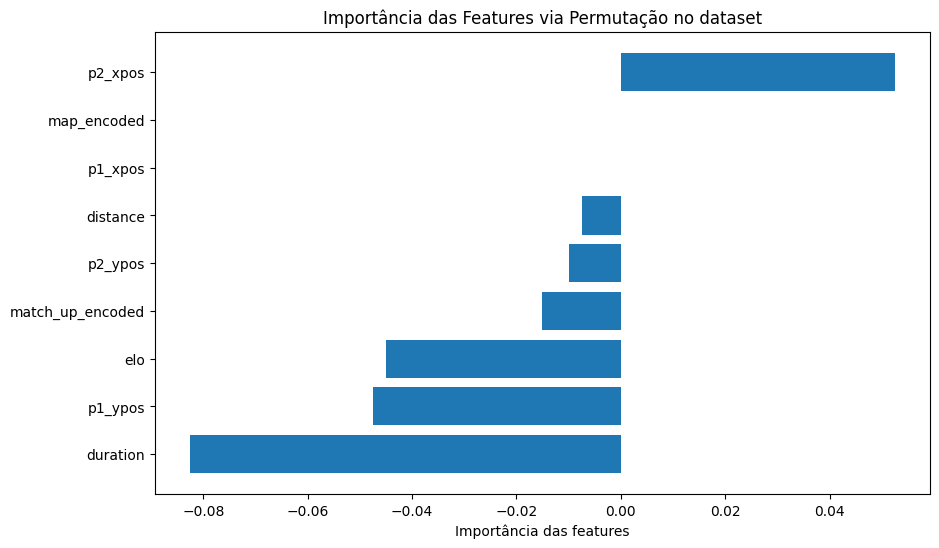

In [259]:
result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Importância das features')
plt.title('Importância das Features via Permutação no dataset')
plt.show()

## Análise das features

In [260]:
fp_indices = np.where((y_pred == 1) & (y_test != 1))[0]
fn_indices = np.where((y_pred != 1) & (y_test == 1))[0]
fp_samples = X_test.iloc[fp_indices]
fn_samples = X_test.iloc[fn_indices]
correctly_classified_samples = X_test[(y_pred == y_test)]
fp_mean = fp_samples.mean()
fn_mean = fn_samples.mean()
correctly_classified_mean = correctly_classified_samples.mean()
comparison_df = pd.DataFrame({
    'Falsos positivos': fp_mean,
    'Falsos Negativos': fn_mean,
    'Classificados corretamente': correctly_classified_mean
})
print('Comparação das Features (Médias):')
print(comparison_df)

Comparação das Features (Médias):
                  Falsos positivos  Falsos Negativos  \
duration               2890.500000       1767.333333   
elo                    1015.583333       1207.500000   
p1_xpos                  58.666667         60.833333   
p2_xpos                  68.833333         59.083333   
p1_ypos                  48.333333         68.333333   
p2_ypos                  67.333333         51.000000   
distance                 71.666667         43.166667   
map_encoded               2.333333          2.750000   
match_up_encoded         82.166667         88.500000   

                  Classificados corretamente  
duration                         1985.181818  
elo                              1119.386364  
p1_xpos                            55.280445  
p2_xpos                            57.155350  
p1_ypos                            59.927391  
p2_ypos                            60.882083  
distance                           36.772873  
map_encoded                  